In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Data preprocessing
# Define Paths
import random

CURR_PATH = os.getcwd()
data_path = os.path.join(CURR_PATH, 'data', 'phase2', 'total')
train_path = os.path.join(CURR_PATH, 'data', 'phase2', 'train')
test_path = os.path.join(CURR_PATH, 'data', 'phase2', 'test')
valid_path = os.path.join(CURR_PATH, 'data', 'phase2', 'validate')

# Moving files to seperate dirs
# Do this only once
# print(len(glob.glob(os.path.join(data_path,'human-*'))))
# Move files for Training
def move_files():
    for c in random.sample(glob.glob(os.path.join(data_path,'human-*')), 1000):
    #     print(c)
        shutil.move(c, os.path.join(train_path, 'human'))
    for c in random.sample(glob.glob(os.path.join(data_path,'null-*')), 1000):
        shutil.move(c, os.path.join(train_path, 'null'))
    # Move files for validation
    for c in random.sample(glob.glob(os.path.join(data_path,'human-*')), 350):
        shutil.move(c, os.path.join(valid_path, 'human'))
    for c in random.sample(glob.glob(os.path.join(data_path,'null-*')), 350):
        shutil.move(c, os.path.join(valid_path, 'null'))
    # Move files for test
    for c in random.sample(glob.glob(os.path.join(data_path,'human-*')), 150):
        shutil.move(c, os.path.join(test_path, 'human'))
    for c in random.sample(glob.glob(os.path.join(data_path,'null-*')), 150):
        shutil.move(c, os.path.join(test_path, 'null'))


print("done")


done


In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['human', 'null'], batch_size=10)
validate_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['human', 'null'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['human', 'null'], batch_size=10, shuffle=False)


Found 2000 images belonging to 2 classes.
Found 700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [5]:
assert train_batches.n == 2000
assert validate_batches.n == 700
assert test_batches.n == 300

assert train_batches.num_classes == validate_batches.num_classes == test_batches.num_classes == 2


In [6]:
def plotImages(img_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

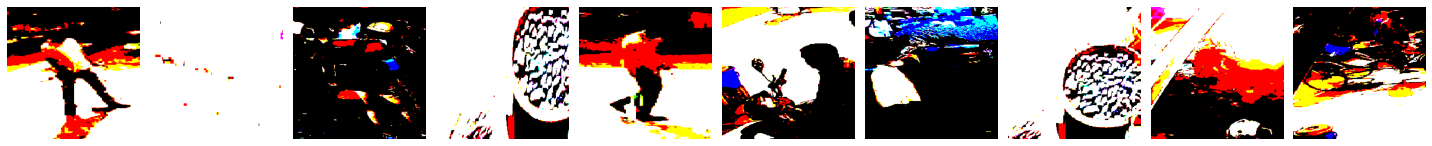

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [7]:
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

In [8]:
# CNN Model definition

model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224, 3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

model.summary()
print(model.summary)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [10]:
# Making Model ready for training 
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Training
model.fit(x=train_batches, validation_data=validate_batches, epochs=10, verbose=2)
print("Saving Model")
model_path = os.path.join(CURR_PATH, 'data', 'phase2', 'model')
model.save(model_path)


Epoch 1/10
200/200 - 72s - loss: 8.0194 - accuracy: 0.7030 - val_loss: 2.3796 - val_accuracy: 0.7286
Epoch 2/10
200/200 - 74s - loss: 0.5451 - accuracy: 0.9015 - val_loss: 1.0832 - val_accuracy: 0.8100
Epoch 3/10
200/200 - 75s - loss: 0.0956 - accuracy: 0.9710 - val_loss: 1.0000 - val_accuracy: 0.8357
Epoch 4/10
200/200 - 73s - loss: 0.0212 - accuracy: 0.9930 - val_loss: 1.0528 - val_accuracy: 0.8257
Epoch 5/10
200/200 - 77s - loss: 0.0042 - accuracy: 0.9995 - val_loss: 0.9679 - val_accuracy: 0.8400
Epoch 6/10
200/200 - 73s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.9572 - val_accuracy: 0.8486
Epoch 7/10
200/200 - 72s - loss: 8.7488e-04 - accuracy: 1.0000 - val_loss: 0.9716 - val_accuracy: 0.8400
Epoch 8/10
200/200 - 72s - loss: 6.3449e-04 - accuracy: 1.0000 - val_loss: 0.9691 - val_accuracy: 0.8529
Epoch 9/10
200/200 - 72s - loss: 5.2032e-04 - accuracy: 1.0000 - val_loss: 0.9809 - val_accuracy: 0.8457
Epoch 10/10
200/200 - 73s - loss: 4.3570e-04 - accuracy: 1.0000 - val_loss: 0.9

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

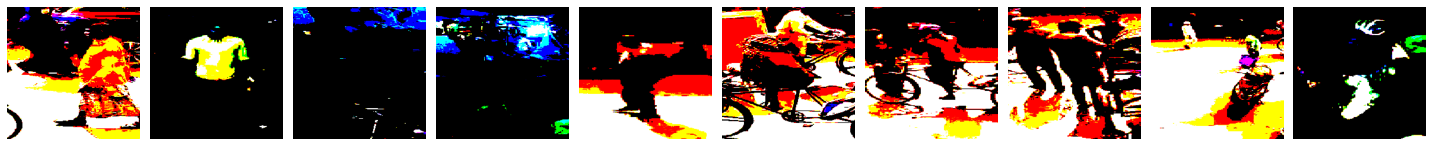

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [12]:
# Prediction
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [13]:
# classes of test
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [14]:
# Predict
predictions = model.predict(x=test_batches, verbose=1) 

30/30 [==============================] - 2s 80ms/step


In [15]:
import numpy as np

print(np.round(predictions))

# Confusion matrix

conf_mat = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [16]:
def plot_conf_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. Normalization can be applied by seting it to True
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, not normalized")
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i, 
            cm[i,j], 
            horizontalalignment='center',
            color = 'white' if cm[i,j] > thresh else 'black'
        )
    plt.tight_layout()
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')

In [17]:
test_batches.class_indices

{'human': 0, 'null': 1}

Confusion matrix, not normalized
[[137  13]
 [ 25 125]]


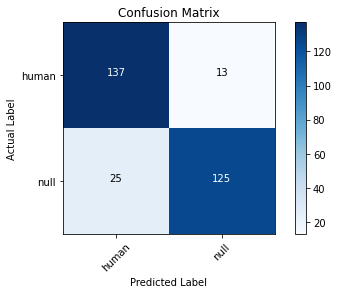

In [18]:
cm_plot_labels = ['human', 'null']
plot_conf_matrix(conf_mat, classes=cm_plot_labels, title='Confusion Matrix')

In [19]:
# Tuning the model. 
# Tuning with VGG16
# Building a Finely tuned VGG16 model - Needs Internet connection

vgg16_model = tf.keras.applications.vgg16.VGG16()

vgg16_model.summary()

553467904/553467096 [==============================] - 69s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________